<a href="https://colab.research.google.com/github/satyalytics/deep_learning/blob/main/Deep_learning_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

To install Keras - conda install keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/zunicd/Bank-Churn-Prediction/master/Resources/Churn_Modelling.csv")

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
X,y = df.drop('Exited', axis=1), df['Exited']
X = pd.get_dummies(X,drop_first=True)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
col = X.columns
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.fit_transform(X_te)

X_tr = pd.DataFrame(X_tr, columns=col)
X_te = pd.DataFrame(X_te, columns=col)

In [14]:
X_tr.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.655826,-0.658743,-0.693054,0.787328,0.814568,0.64512,0.971652,0.523023,1.730897,-0.571962,-1.094717
1,0.098285,-0.370993,0.690201,-1.227152,0.814568,0.64512,-1.029175,-1.516929,-0.577735,-0.571962,0.913478
2,0.635460,-0.850576,0.344387,-1.227152,0.814568,0.64512,-1.029175,0.903952,-0.577735,1.748369,-1.094717
3,0.842065,0.204506,1.036014,-1.227152,0.814568,0.64512,0.971652,1.225141,-0.577735,-0.571962,0.913478
4,0.346212,-0.370993,-0.693054,0.378197,-0.916713,0.64512,0.971652,1.329419,1.730897,-0.571962,0.913478


In [16]:
# importing libraries for ANN

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [30]:
# Initializing ANN

clf = Sequential()

# adding first hidden layers

clf.add(Dense(units=60, kernel_initializer='he_uniform', activation='relu',input_dim=11))
clf.add(Dropout(0.3)) # dropout layer
clf.add(Dense(units=60, kernel_initializer='he_uniform', activation='relu'))
clf.add(Dropout(0.3)) # dropout layer
clf.add(Dense(units=60, kernel_initializer='he_uniform', activation='relu'))
# clf.add(Dropout(0.3)) # dropout layer
clf.add(Dense(units=60, kernel_initializer='he_uniform', activation='relu'))
# clf.add(Dropout(0.3)) # dropout layer
clf.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# compile the ANN

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting ann to the training set

model_history = clf.fit(X_tr, y_tr, validation_split=0.33, batch_size=100, epochs = 150)

Epoch 1/150
54/54 [==============================] - 1s 6ms/step - loss: 1.2106 - accuracy: 0.5018 - val_loss: 0.5011 - val_accuracy: 0.7978
Epoch 2/150
54/54 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7873 - val_loss: 0.4559 - val_accuracy: 0.8069
Epoch 3/150
54/54 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7903 - val_loss: 0.4351 - val_accuracy: 0.8190
Epoch 4/150
54/54 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.8071 - val_loss: 0.4202 - val_accuracy: 0.8247
Epoch 5/150
54/54 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.8010 - val_loss: 0.4197 - val_accuracy: 0.8277
Epoch 6/150
54/54 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.8043 - val_loss: 0.4156 - val_accuracy: 0.8239
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.8067 - val_loss: 0.4067 - val_accuracy: 0.8292
Epoch 8/150
5

In [28]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


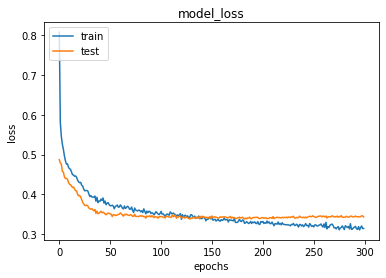

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

y_pred = clf.predict(X_te)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_te, y_pred)
score = accuracy_score(y_te, y_pred)

In [33]:
cm

array([[1556,   74],
       [ 197,  173]])

In [34]:
score

0.8645